In [ ]:
# The goal of the project is to understand what will influence the obtaining of a second date.

In [1]:
# Import librairies
! pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


### Speed Dating Part 1 ###
Start exploring the dataset with pandas to extract some statistics

In [2]:
# Retrieving of dataset

sd=pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")

In [3]:
# Some statistics

print("------------------------------------------")
print("First rows : ")
print()
display(sd.head())
print("------------------------------------------")
print("Size of dataset : {}".format(sd.shape))
print("------------------------------------------")
print("Global description of dataset :")
print("------------------------------------------")
display(sd.describe(include="all"))
print("------------------------------------------")
print("Percentage of missing values: ")
print("------------------------------------------")
print()
display(100*sd.isnull().sum()/sd.shape[0])
print("------------------------------------------")

------------------------------------------
First rows : 



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


------------------------------------------
Size of dataset : (8378, 195)
------------------------------------------
Global description of dataset :
------------------------------------------


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


------------------------------------------
Percentage of missing values: 
------------------------------------------



iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

------------------------------------------


In [4]:
# The dataset shape is 8378 rows x 195 columns
# There are 552 participants
# Lot of columns are with NaN status, so I decided to drop them with the following rule : missing values rate > 50 %

In [5]:
# Creation of new dataset sd2 with dropped columns

sd2 = sd.loc[:,100*sd.isnull().sum()/sd.shape[0]<50]
sd2.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# it remains 136 columns

In [7]:
# Percentage of people with match yes = 1 / No = 0

match = sd2['match'].value_counts()/sd2['match'].count()*100
display(match)

0    83.528288
1    16.471712
Name: match, dtype: float64

In [25]:
# Percentage of people with decision yes = 1 / No = 0

dec = sd2['dec_o'].value_counts()/sd2['dec_o'].count()*100
display(dec)

0    58.044879
1    41.955121
Name: dec_o, dtype: float64

In [8]:
# We have only 16,5 % of the participants who are ok for a second date.
# But we have 41 % with decision yes
# why ?

### Speed Dating Part 2 ###
Let's try to produce our first visualisations with Seaborn. Based on the exploration you realized, 
try to find good representations of the dataset that allow to summarize 
some statistics as well as relationships between variables.

In [26]:
#Selection of columns for correlation mapping
columns_ok = ["dec_o","match","satis_2","exphappy","gender","age_o","match_es","int_corr","samerace","race_o","race","goal","attr_o","from","field","imprace","imprelig"]
dfsel = sd2.loc[:,columns_ok]
dfsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dec_o     8378 non-null   int64  
 1   match     8378 non-null   int64  
 2   satis_2   7463 non-null   float64
 3   exphappy  8277 non-null   float64
 4   gender    8378 non-null   int64  
 5   age_o     8274 non-null   float64
 6   match_es  7205 non-null   float64
 7   int_corr  8220 non-null   float64
 8   samerace  8378 non-null   int64  
 9   race_o    8305 non-null   float64
 10  race      8315 non-null   float64
 11  goal      8299 non-null   float64
 12  attr_o    8166 non-null   float64
 13  from      8299 non-null   object 
 14  field     8315 non-null   object 
 15  imprace   8299 non-null   float64
 16  imprelig  8299 non-null   float64
dtypes: float64(11), int64(4), object(2)
memory usage: 1.1+ MB


<AxesSubplot:>

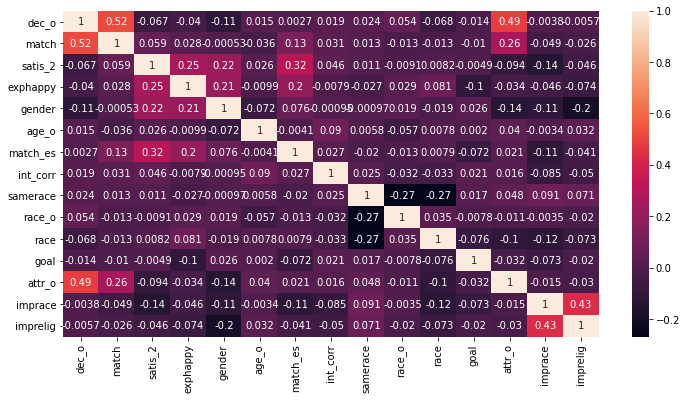

In [29]:
#Heatmap for correlation
corr = dfsel.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

In [13]:
# We can see on the heatmap that we have no relevant correlation between variables , 
# excepted the couples : 
#"dec_o / match"
#"dec_o / attr_o" 
#"imprace / imprelig"

# it's astoned that we have no correlation about age whereas !

#imprace:
#How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

#imprelig:
#How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

#dec_o:
#decision of partner the night of event

# match :
#1=yes, 0=no

# attr_o:
#rating by partner the night of the event, for all 6 attributes


In [30]:
dfsel.describe(include='all')

,dec_o,match,satis_2,exphappy,gender,age_o,match_es,int_corr,samerace,race_o,race,goal,attr_o,from,field,imprace,imprelig
count,8378.000000,8378.000000,7463.000000,8277.000000,8378.000000,8274.000000,7205.000000,8220.000000,8378.000000,8305.000000,8315.000000,8299.000000,8166.000000,8299,8315,8299.000000,8299.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,259,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,Business,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522,521,NaN,NaN
mean,0.419551,0.164717,5.711510,5.534131,0.500597,26.364999,3.207814,0.196010,0.395799,2.756653,2.757186,2.122063,6.190411,NaN,NaN,3.784793,3.651645
std,0.493515,0.370947,1.820764,1.734059,0.500029,3.563648,2.444813,0.303539,0.489051,1.230689,1.230905,1.407181,1.950305,NaN,NaN,2.845708,2.805237
min,0.000000,0.000000,1.000000,1.000000,0.000000,18.000000,0.000000,-0.830000,0.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,0.000000,1.000000
25%,0.000000,0.000000,5.000000,5.000000,0.000000,24.000000,2.000000,-0.020000,0.000000,2.000000,2.000000,1.000000,5.000000,NaN,NaN,1.000000,1.000000
50%,0.000000,0.000000,6.000000,6.000000,1.000000,26.000000,3.000000,0.210000,0.000000,2.000000,2.000000,2.000000,6.000000,NaN,NaN,3.000000,3.000000
75%,1.000000,0.000000,7.000000,7.000000,1.000000,28.000000,4.000000,0.430000,1.000000,4.000000,4.000000,2.000000,8.000000,NaN,NaN,6.000000,6.000000


In [31]:
# We'll check the percentage of missing values on my selection

print("Percentage of missing values: ")
print("------------------------------------------")
print()
display(100*dfsel.isnull().sum()/dfsel.shape[0])

Percentage of missing values: 
------------------------------------------



dec_o        0.000000
match        0.000000
satis_2     10.921461
exphappy     1.205538
gender       0.000000
age_o        1.241346
match_es    14.000955
int_corr     1.885892
samerace     0.000000
race_o       0.871330
race         0.751969
goal         0.942946
attr_o       2.530437
from         0.942946
field        0.751969
imprace      0.942946
imprelig     0.942946
dtype: float64

In [12]:
# Maximum missing value is 14 % for match_es

In [32]:
# The first feature close to "match" feature is "attr_o" with a index of 0,26
abs(corr['match']).sort_values(ascending = False)

match       1.000000
dec_o       0.522326
attr_o      0.260837
match_es    0.130592
satis_2     0.059370
imprace     0.049032
age_o       0.035865
int_corr    0.031121
exphappy    0.027880
imprelig    0.026014
race        0.013268
race_o      0.013088
samerace    0.013028
goal        0.010306
gender      0.000530
Name: match, dtype: float64

### Speed Dating - Part 3 ###



Continue exploring the Speed Dating dataset. You can use Seaborn and/or Matplotlib in case you want to master the rendering of the visualizations : for example, try to superimpose different plots, change the color palettes, add some texts, etc,...

One thing to remember : in EDA, there's not one only way to highlight relevant information ! And there are choices to be made about the aspects you'd like to explore in this dataset, so don't hesitate to be creative :-)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age_o', ylabel='Density'>

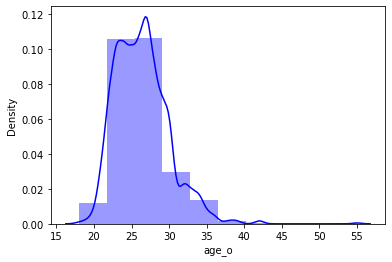

In [15]:
# check the age of participants
sns.distplot(dfsel['age_o'], bins=10, color='blue')

In [16]:
# Most of participants are between 22 and 30 years old
# Herebelow the three graphs about correlation, we cans see a linear regression for the

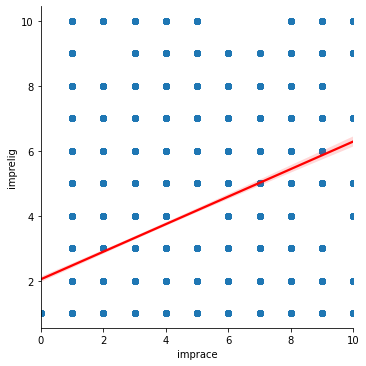

In [17]:
sns.lmplot(x='imprace', y='imprelig', data=dfsel, line_kws={'color': 'red'})


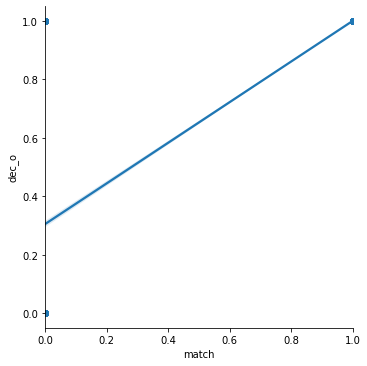

In [45]:
sns.lmplot(x='match', y='dec_o', data=dfsel)

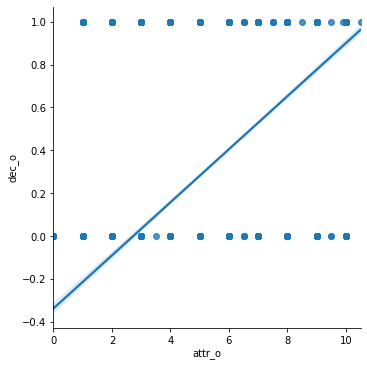

In [46]:
sns.lmplot(x='attr_o', y='dec_o', data=dfsel)
#the attractive for a decision ok is bigger than no decision 

### Speed Dating - Part 4 ###

Let's finalize our project by adding some interactivity to it ! Try using Plotly to make at least one interactive graph.



In [40]:
fig = px.scatter(dfsel, x='match', y='dec_o', color = "dec_o", trendline = "ols")
fig.show()

In [ ]:
# In conclusion, we have no strong correlation enabling to see what could influence the decision of a seconde date for a new speedating round
# given that the high number of features (x 195), and important missing values, this dataset should be simplified by creating clusters
# some of features are incomprehensible (Dec_o and match) and feel as if a redundant situation